In [5]:
import pandas as pd
import geopandas as gpd
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [6]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

### Geographic Partionining
* We have a few options in partionining mobile data spatially
    * __Option 1__: Call a free geocoding API (i.e. Nominatim) to get the relevant OpenStreetMap information. From here we can find the bounding box coordinates of a particular POI
    * __Option 2__: Partition by federal and/or state designations, i.e. census tracts, zip codes, etc.

#### Geocoding Example

In [7]:
locator = Nominatim(user_agent="Untitled-1")

In [8]:
location = locator.geocode("Allerton Park & Retreat Center")
location.raw

{'place_id': 123369969,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 74924556,
 'boundingbox': ['39.9816336', '40.0139883', '-88.6741759', '-88.6273892'],
 'lat': '39.997755350000006',
 'lon': '-88.64642250857688',
 'display_name': 'Robert Allerton Park, Monticello, Piatt County, Illinois, 61856, United States',
 'class': 'leisure',
 'type': 'park',
 'importance': 0.521409003314806}

In [9]:
bbox = list()
[bbox.append(float(i)) for i in location.raw['boundingbox']]
bbox

[39.9816336, 40.0139883, -88.6741759, -88.6273892]

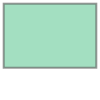

In [14]:
from shapely.geometry import box

miny, maxy, minx, maxx = bbox

poly = box(minx=minx, miny=miny, maxx=maxx, maxy=maxy)

poly

#### Census Tract Example

In [23]:
OK_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_40_tract_500k.zip"
OK_tracts = gpd.read_file(OK_url)
OK_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,40,007,951600,1400000US40007951600,40007951600,9516,Census Tract 9516,OK,Beaver County,Oklahoma,CT,1971018179,6122262,"POLYGON ((-100.95421 36.71703, -100.95421 36.7..."
1,40,139,950800,1400000US40139950800,40139950800,9508,Census Tract 9508,OK,Texas County,Oklahoma,CT,5124635,0,"POLYGON ((-101.49220 36.68950, -101.48157 36.6..."
2,40,047,001100,1400000US40047001100,40047001100,11,Census Tract 11,OK,Garfield County,Oklahoma,CT,972877962,1905317,"POLYGON ((-98.10438 36.47031, -98.10437 36.477..."
3,40,131,050104,1400000US40131050104,40131050104,501.04,Census Tract 501.04,OK,Rogers County,Oklahoma,CT,1956422,0,"POLYGON ((-95.63264 36.31094, -95.62823 36.311..."
4,40,101,000200,1400000US40101000200,40101000200,2,Census Tract 2,OK,Muskogee County,Oklahoma,CT,8409929,35504,"POLYGON ((-95.41162 35.78401, -95.40494 35.784..."


In [30]:
IL_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_17_tract_500k.zip"
IL_tracts = gpd.read_file(IL_url)
IL_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,17,143,000200,1400000US17143000200,17143000200,2,Census Tract 2,IL,Peoria County,Illinois,CT,971324,0,"POLYGON ((-89.64231 40.66903, -89.64230 40.670..."
1,17,143,003200,1400000US17143003200,17143003200,32,Census Tract 32,IL,Peoria County,Illinois,CT,3192142,0,"POLYGON ((-89.62153 40.77981, -89.62148 40.783..."
2,17,003,957900,1400000US17003957900,17003957900,9579,Census Tract 9579,IL,Alexander County,Illinois,CT,10197484,4353423,"POLYGON ((-89.19649 37.00498, -89.19298 37.006..."
3,17,073,030800,1400000US17073030800,17073030800,308,Census Tract 308,IL,Henry County,Illinois,CT,22273126,31720,"POLYGON ((-89.92486 41.24720, -89.92063 41.248..."
4,17,107,953100,1400000US17107953100,17107953100,9531,Census Tract 9531,IL,Logan County,Illinois,CT,13166640,375360,"POLYGON ((-89.41759 40.16712, -89.41683 40.172..."


#### Now let's read in our mobile data

In [49]:
IL_data = pd.read_csv('IL_1000_April06-08.csv')
IL_gpd = gpd.GeoDataFrame(IL_data, crs='EPSG:4326', geometry=gpd.points_from_xy(IL_data['lon'], IL_data['lat']))
#aea_proj_str = '+proj=aea +lat_1=38.00 +lat_2=42.00 +lat_0=40.11 +lon_0=-88.228'
#IL_gpd = IL_gpd.to_crs(aea_proj_str)

In [50]:
IL_gpd.geometry

0         POINT (-88.24466 40.06169)
1         POINT (-88.24466 40.06169)
2         POINT (-88.24466 40.06169)
3         POINT (-88.24466 40.06169)
4         POINT (-88.24466 40.06169)
                     ...            
235362    POINT (-88.19766 40.08841)
235363    POINT (-88.19766 40.08841)
235364    POINT (-88.19766 40.08841)
235365    POINT (-88.19766 40.08841)
235366    POINT (-88.19766 40.08841)
Name: geometry, Length: 235367, dtype: geometry